In [35]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

In [4]:
# Read in the data

df = pd.read_csv(r'/Users/lauren/Data Portfolio Projects/movies.csv')

In [8]:
# Looking at the data
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [30]:
# Missing Data Check
# Percentage of missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

# Sum of missing data
df[['budget', 'gross']].isna().sum()

# Fill missing data with median
df['budget'] = df['budget'].fillna(df['budget'].median())
df['gross'] = df['gross'].fillna(df['budget'].median())

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.0%
gross - 0.0%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%
cleandate - 0.007694314032342202%
yearcorrect - 0.0%


In [31]:
# Data typyes for columns

df.dtypes

name                   object
rating                 object
genre                  object
year                    int64
released               object
score                 float64
votes                 float64
director               object
writer                 object
star                   object
country                object
budget                  Int64
gross                   Int64
company                object
runtime               float64
cleandate      datetime64[ns]
yearcorrect            object
dtype: object

In [11]:
# Changing the columns data type
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States  20500000   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa  20500000   

          gross                    company  runtime  
0      46998772               Warner Bros.    146.0  
1      58853106          Columbia Pictures    104.0  
2     538375067                  Lucasfilm    124.0  
3      83453539         Paramount Pictures     88.0  
4      39846344             Orion Pictures     98.0  
...         ...                        ...      ...  
7663   20500000                        NaN     90.0  
7664   20500000  Cactus Blue Entertainment     90.0  
7665   20500000           Embi Productions      NaN  
7666   20500000                        NaN    120.0  
7667   20500000                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [12]:
# Creating a correct year column
# Adjusting date format
df['cleandate'] = df['released'].str.extract(r'([A-Za-z]+\s+\d{1,2},\s+\d{4})')
df['cleandate'] = pd.to_datetime(df['cleandate'])
df

# Adjust the year column for correct year
df['yearcorrect'] = df['cleandate'].astype(str).str[:4]
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

                              released  score      votes         director  \
0        June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1         July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2        June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3         July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4        July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   
...                                ...    ...        ...              ...   
7663  October 23, 2020 (United States)    3.1       18.0    Joseph Ebanks   
7664  February 7, 2020 (United States)    4.7       36.0     Dusty Dukatz   
7665         April 27, 2020 (Cameroon)    5.7       29.0     Nkanya Nkwai   
7666   October 1, 2020 (United States)    NaN        NaN    James Randall   
7667   August 19, 2020 (United States)    5.7        7.0     Pereko Mosia   

                       writer              star         country    budget  \
0                Stephen King    Jack Nicholson  United Kingdom  19000000   
1     Henry De Vere Stacpoole    Brooke Shields   United States   4500000   
2              Leigh Brackett       Mark Hamill   United States  18000000   
3                Jim Abrahams       Robert Hays   United States   3500000   
4          Brian Doyle-Murray       Chevy Chase   United States   6000000   
...                       ...               ...             ...       ...   
7663            Joseph Ebanks      Shannon Bond   United States      7000   
7664              Lisa Huston  Michael Saquella   United States  20500000   
7665             Lynno Lovert      Onyama Laura   United States     58750   
7666            James Randall     Christina Roz   United States     15000   
7667             Pereko Mosia  Siyabonga Mabaso    South Africa  20500000   

          gross                    company  runtime  cleandate yearcorrect  
0      46998772               Warner Bros.    146.0 1980-06-13        1980  
1      58853106          Columbia Pictures    104.0 1980-07-02        1980  
2     538375067                  Lucasfilm    124.0 1980-06-20        1980  
3      83453539         Paramount Pictures     88.0 1980-07-02        1980  
4      39846344             Orion Pictures     98.0 1980-07-25        1980  
...         ...                        ...      ...        ...         ...  
7663   20500000                        NaN     90.0 2020-10-23        2020  
7664   20500000  Cactus Blue Entertainment     90.0 2020-02-07        2020  
7665   20500000           Embi Productions      NaN 2020-04-27        2020  
7666   20500000                        NaN    120.0 2020-10-01        2020  
7667   20500000                PK 65 Films    102.0 2020-08-19        2020  

[7668 rows x 17 columns]

In [13]:
pd.set_option('display.max_rows', None)

In [14]:
# Drop and duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

<function matplotlib.pyplot.show(close=None, block=None)>

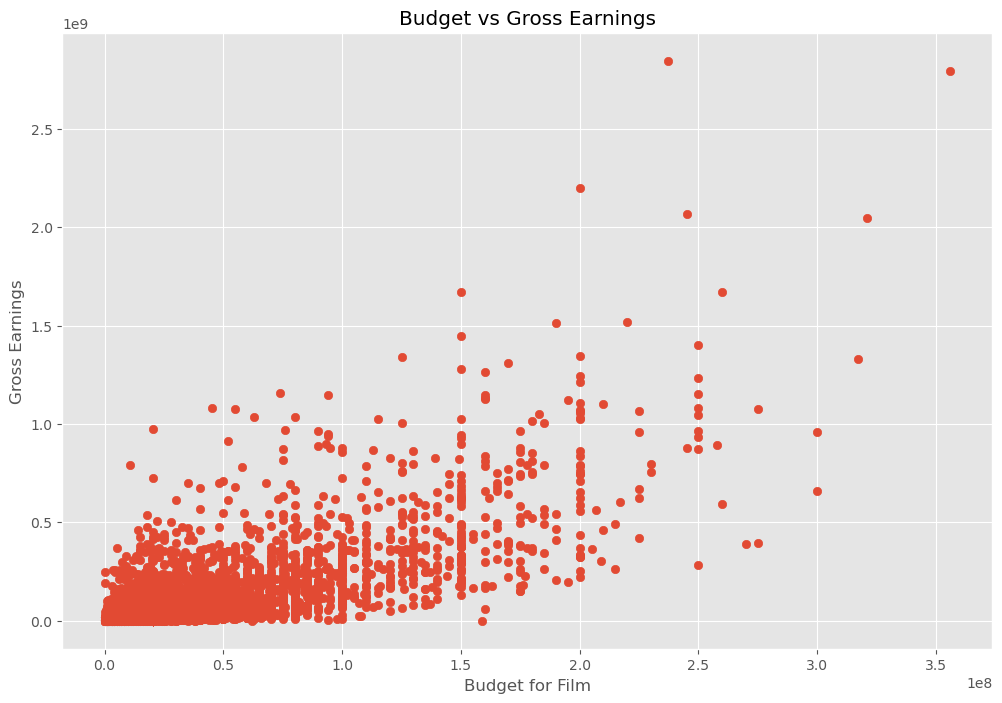

In [27]:
# Scatter plot with budget vs gross revenue
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')

plt.show

In [26]:
top_budget = df.nlargest(100, 'budget')
top_budget[['name', 'company','gross','budget']].head(10)

name  \
7445                              Avengers: Endgame   
7244                         Avengers: Infinity War   
7075        Star Wars: Episode VIII - The Last Jedi   
5060       Pirates of the Caribbean: at World's End   
7066                                 Justice League   
7261                        Solo: A Star Wars Story   
7463  Star Wars: Episode IX - The Rise of Skywalker   
4870                               Superman Returns   
5658                                        Tangled   
7480                                  The Lion King   

                            company       gross     budget  
7445                 Marvel Studios  2797501328  356000000  
7244                 Marvel Studios  2048359754  321000000  
7075           Walt Disney Pictures  1332698830  317000000  
5060           Walt Disney Pictures   960996492  300000000  
7066                   Warner Bros.   657926987  300000000  
7261                      Lucasfilm   392924807  275000000  
7463           Walt Disney Pictures  1078232589  275000000  
4870                   Warner Bros.   391081192  270000000  
5658  Walt Disney Animation Studios   592462816  260000000  
7480           Walt Disney Pictures  1670727580  260000000

<Axes: xlabel='budget', ylabel='gross'>

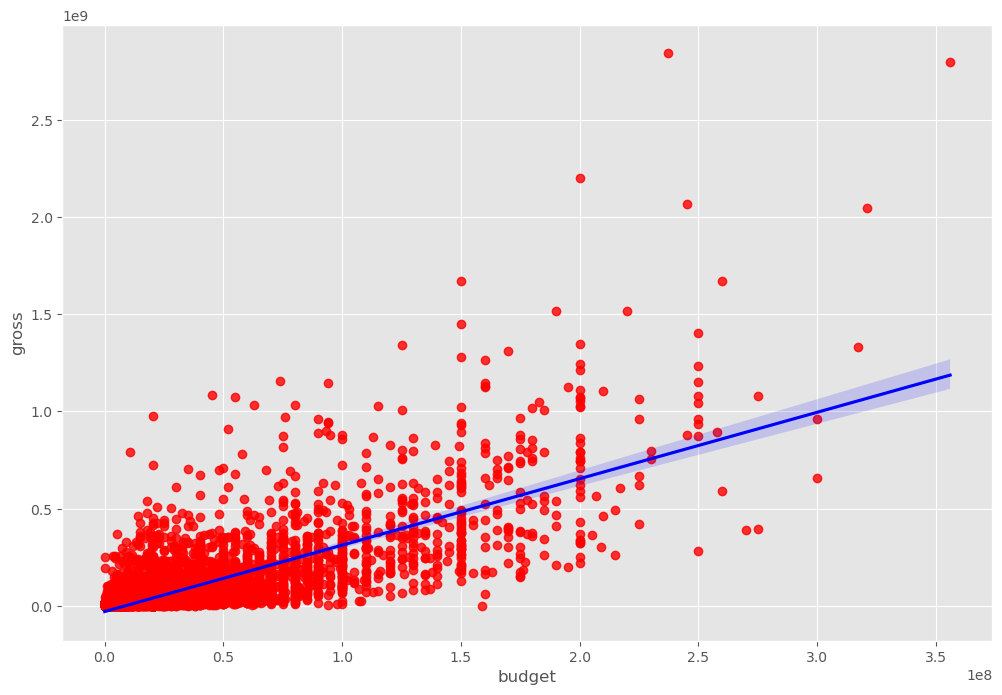

In [48]:
# Plot the budget vs gross using seaborn
df['budget'] = df['budget'].astype(float)
df['gross'] = df['gross'].astype(float)

sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [57]:
# Exploring correlations
df.corr(method='pearson', numeric_only=True) # Pearson correlation
# Linear relationship

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.291690  0.259469  0.120811
score    0.097995  1.000000  0.409182  0.061979  0.185571  0.399451
votes    0.222945  0.409182  1.000000  0.460932  0.632091  0.309212
budget   0.291690  0.061979  0.460932  1.000000  0.745873  0.273363
gross    0.259469  0.185571  0.632091  0.745873  1.000000  0.244346
runtime  0.120811  0.399451  0.309212  0.273363  0.244346  1.000000

In [69]:
print(df.select_dtypes(include='number').columns)
print(df.corr(numeric_only=True))

Index(['year', 'score', 'votes', 'budget', 'gross', 'runtime'], dtype='object')
             year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.291690  0.259469  0.120811
score    0.097995  1.000000  0.409182  0.061979  0.185571  0.399451
votes    0.222945  0.409182  1.000000  0.460932  0.632091  0.309212
budget   0.291690  0.061979  0.460932  1.000000  0.745873  0.273363
gross    0.259469  0.185571  0.632091  0.745873  1.000000  0.244346
runtime  0.120811  0.399451  0.309212  0.273363  0.244346  1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

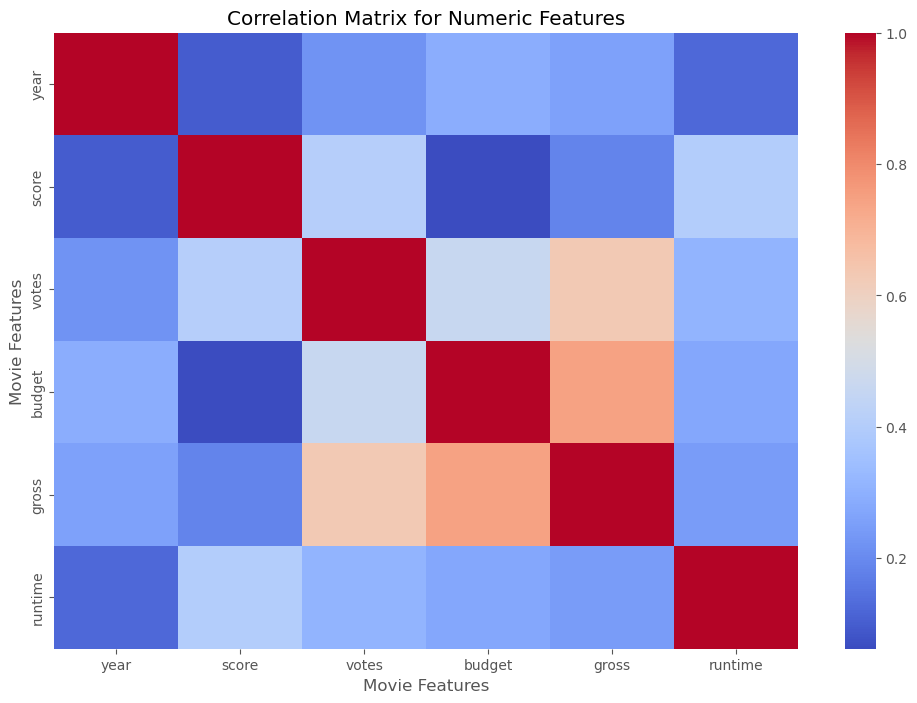

In [84]:
# Correlation Matrix
correlation_matrix = df.corr(method='pearson', numeric_only=True)


sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [87]:
# Exploring Compnay Data
df['budget'] = df['budget'].astype('Int64')
df['gross'] = df['gross'].astype('Int64')

df_numerized = df
for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized

name  rating  genre  year  released  score      votes  director  writer  \
0     6587       6      6  1980      1705    8.4   927000.0      2589    4014   
1     5573       6      1  1980      1492    5.8    65000.0      2269    1632   
2     5142       4      0  1980      1771    8.7  1200000.0      1111    2567   
3      286       4      4  1980      1492    7.7   221000.0      1301    2000   
4     1027       6      4  1980      1543    7.3   108000.0      1054     521   
5     2109       6     10  1980      2502    6.4   123000.0      2528    4362   
6     5574       6      0  1980      1771    7.9   188000.0      1412     838   
7     4436       6      3  1980       699    8.2   330000.0      1829    1769   
8     5281       4      0  1980      1753    6.8   101000.0      2306    1979   
9     6213       6      3  1980      2286    7.0    10000.0      2864     423   
10     463       4      0  1980       674    6.1    18000.0       357    3985   
11    5920       4      1  1980      2987    7.3    54000.0      1199    1832   
12    4315       4      1  1980       626    5.3    30000.0      2352    2333   
13    4084       6      6  1980      3211    7.7    49000.0      2388    2327   
14    1687       6      5  1980      1543    7.1    37000.0       318     520   
15    5024       4      6  1980      3021    7.2    27000.0      1243    3548   
16    1900       6      6  1980      2286    6.6    21000.0        49     735   
17      92       4      4  1980       699    6.9    29000.0       514    3262   
18    5865       6     10  1980      1108    6.8    66000.0      1374    2104   
19    5189       6      4  1980       626    6.8    26000.0      2561     556   
20    1387       6      5  1980       945    6.5    20000.0      2891    4451   
21    2451       6      1  1980       160    6.8    14000.0      1892    2926   
22    5845       4      0  1980       281    6.7    22000.0       744    4192   
23    7445       4      8  1980       585    5.3    12000.0      2371    3528   
24    7127       4      6  1980      1913    6.4    14000.0      1153      12   
25     346       6     10  1980       773    6.9    33000.0      1583    3234   
26    3263       6      4  1980      2059    6.5     5100.0      2433    2483   
27    4442       4      0  1980       281    5.0     4100.0      1282      33   
28     980       6      5  1980      1771    7.2    17000.0      2673    4386   
29     362       6      5  1980       886    6.2    22000.0      2151    3326   
30    3796       4      4  1980      3296    7.1     8900.0      2811      83   
31    4373       6     10  1980      1467    5.4    16000.0      2143    4455   
32    4987       4      0  1980       342    5.3    15000.0      1041    1587   
33    1103       4      6  1980       160    6.1      604.0      1644     958   
34    4785       4      4  1980       699    6.7     9100.0      1225    3136   
35    4362       6      4  1980      2818    6.2    24000.0      1091    3107   
36    6008       6      4  1980      2452    6.3     4300.0       855    1358   
37    3721       6      4  1980      2965    6.0    11000.0      1598    3642   
38    6102       4      6  1980       699    5.9     4000.0      2296    3826   
39    1244       4      3  1980      2195    7.5    17000.0      1884    4201   
40    6748       4      7  1980      3101    6.3     5700.0      1403     518   
41     927       4      6  1980      1588    7.9    13000.0       335    2252   
42    6644       6      0  1980      1836    7.1     9000.0      2314    2543   
43    7305       6      3  1980       169    6.6    11000.0       186    1682   
44    5504       6     10  1980      3042    4.8     2000.0      1978     151   
45    1152       6      4  1980      1467    6.1    12000.0      2804    4298   
46    6094       6      0  1980      1705    5.3     3900.0      1934    3357   
47    5578       6     10  1980      2775    4.6     3900.0      2836    4344   
48    6360       4      0  1980      

<function matplotlib.pyplot.show(close=None, block=None)>

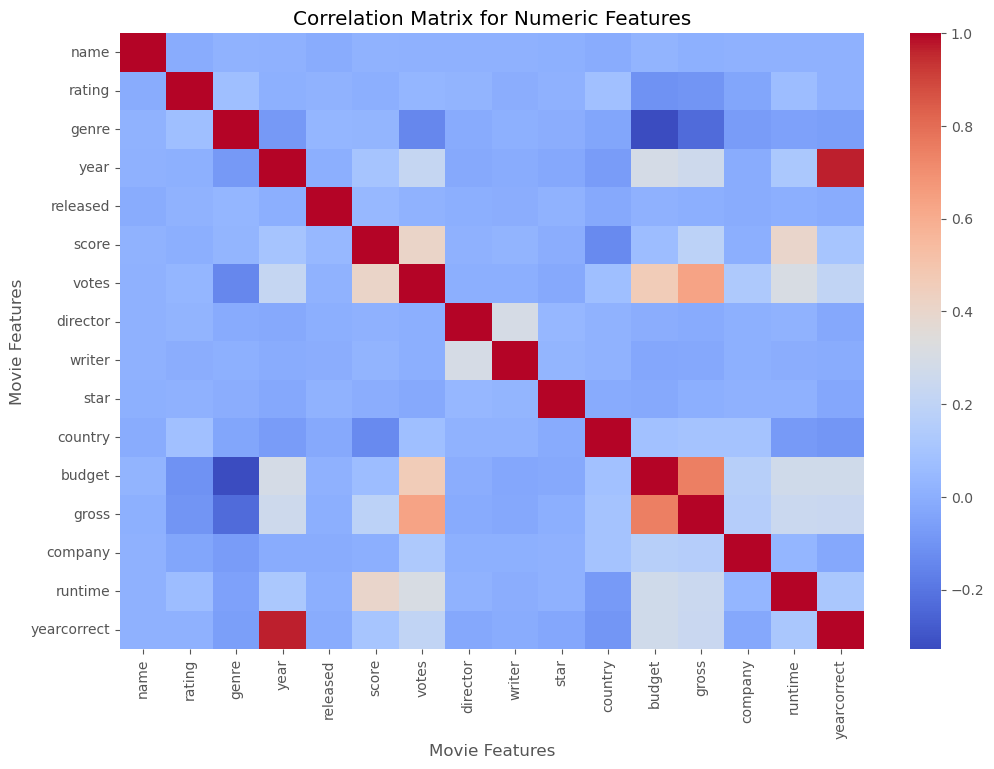

In [88]:
# Correlation Matrix
correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True)


sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show

In [89]:
print(df_numerized.select_dtypes(include='number').columns)
print(df_numerized.corr(numeric_only=True))

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime', 'yearcorrect'],
      dtype='object')
                 name    rating     genre      year  released     score  \
name         1.000000 -0.008069  0.016355  0.011453 -0.011311  0.017097   
rating      -0.008069  1.000000  0.072423  0.008779  0.016613 -0.001314   
genre        0.016355  0.072423  1.000000 -0.081261  0.029822  0.027965   
year         0.011453  0.008779 -0.081261  1.000000 -0.000695  0.097995   
released    -0.011311  0.016613  0.029822 -0.000695  1.000000  0.042788   
score        0.017097 -0.001314  0.027965  0.097995  0.042788  1.000000   
votes        0.013088  0.033225 -0.145307  0.222945  0.016097  0.409182   
director     0.009079  0.019483 -0.015258 -0.020795 -0.001478  0.009559   
writer       0.009081 -0.005921  0.006567 -0.008656 -0.002404  0.019416   
star         0.006472  0.013405 -0.005477 -0

In [90]:
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             released      -0.011311
             score          0.017097
             votes          0.013088
             director       0.009079
             writer         0.009081
             star           0.006472
             country       -0.010737
             budget         0.020921
             gross          0.006596
             company        0.009211
             runtime        0.010392
             cleandate     -0.004951
             yearcorrect    0.012835
rating       name          -0.008069
             rating         1.000000
             genre          0.072423
             year           0.008779
             released       0.016613
             score         -0.001314
             votes          0.033225
             director       0.019483
             writer        -0.005921
             star           0.013405
 

In [92]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

budget       genre         -0.328484
genre        budget        -0.328484
             gross         -0.233371
gross        genre         -0.233371
genre        votes         -0.145307
votes        genre         -0.145307
country      score         -0.133348
score        country       -0.133348
budget       rating        -0.108776
rating       budget        -0.108776
             gross         -0.097239
gross        rating        -0.097239
yearcorrect  country       -0.090962
country      yearcorrect   -0.090962
genre        year          -0.081261
year         genre         -0.081261
genre        cleandate     -0.080051
cleandate    genre         -0.080051
runtime      country       -0.078412
country      runtime       -0.078412
genre        company       -0.071067
company      genre         -0.071067
country      year          -0.070938
year         country       -0.070938
yearcorrect  genre         -0.063573
genre        yearcorrect   -0.063573
             runtime       -0.052711
r

In [93]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
high_corr

gross        votes          0.632091
votes        gross          0.632091
budget       gross          0.745873
gross        budget         0.745873
year         yearcorrect    0.967486
yearcorrect  year           0.967486
name         name           1.000000
writer       writer         1.000000
runtime      runtime        1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
cleandate    cleandate      1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes & Budget have the highest correelation to gross earnings